In [1]:
import numpy as np
from fmskill import ModelResult, PointObservation, Connector
import fmskill.metrics as mtr 
%matplotlib inline

In [2]:
fn = '../tests/testdata/TS.dfs0'
mr = ModelResult(fn, 'OresundHD', item='Klagshamn: Surface elevation')
print(mr)
print(mr.dfs)

<DfsModelResultItem> 'OresundHD'
File: ../tests/testdata/TS.dfs0
- Item: 3: Klagshamn: Surface elevation <Surface Elevation> (meter)
<mikeio.Dfs0>
Timeaxis: TimeAxisType.EquidistantCalendar
Number of items: 12


In [3]:
fn = '../tests/testdata/smhi_2095_klagshamn.dfs0'
o1 = PointObservation(fn, x=366844.15, y=6154291.6, item=0, name='Klagshamn') 
print(o1)
print(o1.n_points, o1.start_time)

PointObservation: Klagshamn, x=366844.15, y=6154291.6
50328 2015-01-01 01:00:00


In [4]:
con = Connector(o1, mr, validate=False)
con

c:\users\jem\source\fmskill\fmskill\connection.py:181: UserWarning: Item type mismatch! Obs 'Klagshamn' item: Water Level, model 'OresundHD' item: Surface Elevation
  warnings.warn(


<Connector> with 
 -<PointConnector> obs=Klagshamn(n=50328) :: model=OresundHD

In [5]:
cc = con.extract()
cc

<ComparerCollection>
PointComparer: Klagshamn

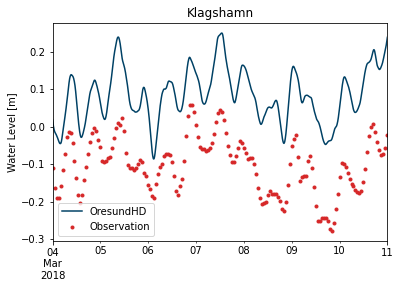

In [6]:
cc["Klagshamn"].plot_timeseries();

In [7]:
cmp = cc["Klagshamn"]
cmp.skill()

n      bias      rmse     urmse       mae      cc        si  \
observation                                                                  
Klagshamn    169  0.187172  0.191682  0.041336  0.187172  0.8423  0.325449   

                   r2  
observation            
Klagshamn   -5.549174

In [8]:
mtr.rmse(cmp.obs, cmp.mod, unbiased=False)

0.19168248446362082